In [1]:
import os, sys
import pandas as pd
import numpy as np
from plotnine import *

os.chdir(r'/data2/share/home/liyi/CbpTE/ReseqTE_matrix/19Ge_reseq_matrix/filt')

In [2]:
specie = "Cbp"
reseq_mat = pd.read_csv(f'reseq_{specie}.mat', sep='\t', dtype=str)
reseq_mat1 = reseq_mat.replace('./.', np.nan)

In [3]:
count_result = reseq_mat1.iloc[:, 6:].apply(lambda col: (col == '1/1').sum())
count_result1 = count_result.reset_index()
count_result1.columns = ['Accession', 'Count']
mean_value = round(count_result.mean())
print(mean_value)

91060


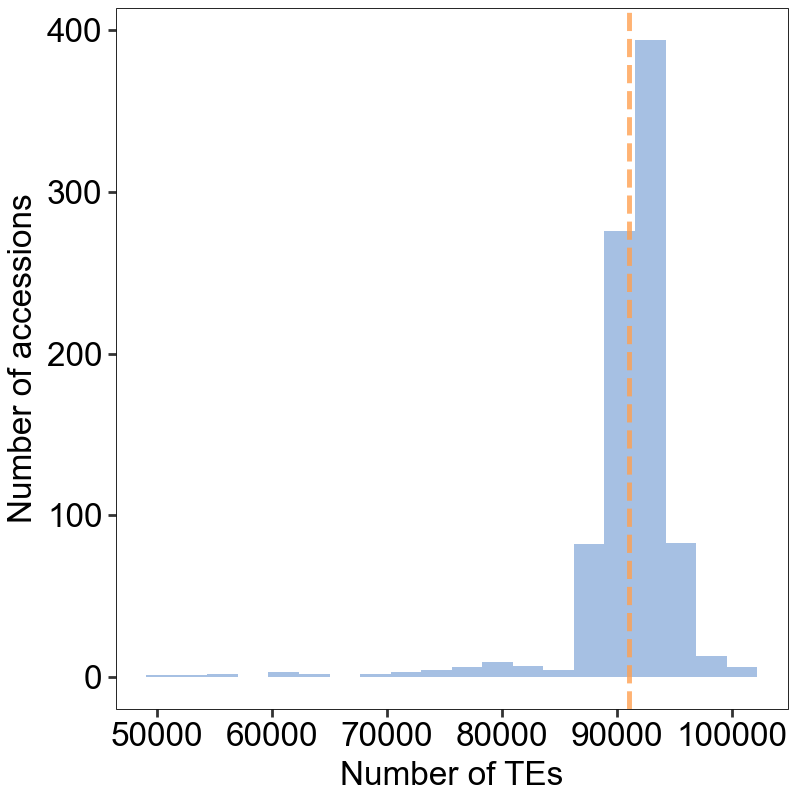

/data2/share/home/liyi/software/miniconda3/envs/plot_make/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 4 x 4 in image.
/data2/share/home/liyi/software/miniconda3/envs/plot_make/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: reseq_Cbp_site_freq.svg


In [4]:
plot = (
    ggplot(count_result1, aes(x='Count'))
    + geom_histogram(bins=20, fill='#A6C0E3')
    + geom_vline(aes(xintercept=mean_value), color='#FFA050', linetype='dashed', alpha=0.8, size=1)
    # + geom_text(aes(x=mean_value-2800, label=f'{mean_value}'), y=42, size=10, angle=0)
    + labs(x='Number of TEs', y='Number of accessions')
    + theme(figure_size=(4,4),
        # legend_position=(0.98, 0.98),
        axis_title_x=element_text(size=12, color="black", family="Arial"),
        axis_title_y=element_text(size=12, color="black", family="Arial"), 
        axis_text_x=element_text(size=12, color="black", family="Arial"),
        axis_text_y=element_text(size=12, color="black", family="Arial"),
        legend_title=element_text(size=10, family="Arial"), 
        legend_text=element_text(size=10, family="Arial"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_background=element_rect(fill='white'),
        panel_border=element_rect(color="black", size=0.3),
        )
)
plot.show()
plot.save(f"reseq_{specie}_site_freq.svg", format="svg", dpi=300)

In [2]:
specie = "all"
reseq_mat = pd.read_csv(f'reseq_{specie}.mat', sep='\t')
reseq_pop = pd.read_csv(f'../0-scripts/population.txt', sep='\t', header=None, index_col=0)
reseq_mat1 = reseq_mat.replace('./.', np.nan).iloc[:, 6:].apply(lambda col: (col == '1/1').sum())
reseq_mat2 = pd.concat([reseq_mat1, reseq_pop], axis=1)
reseq_mat2.columns = ['TE_num', 'pop']
pop_list = reseq_mat2['pop'].unique().tolist()

In [3]:
reseq_mat2[reseq_mat2.isnull().any(axis=1)]

,TE_num,pop


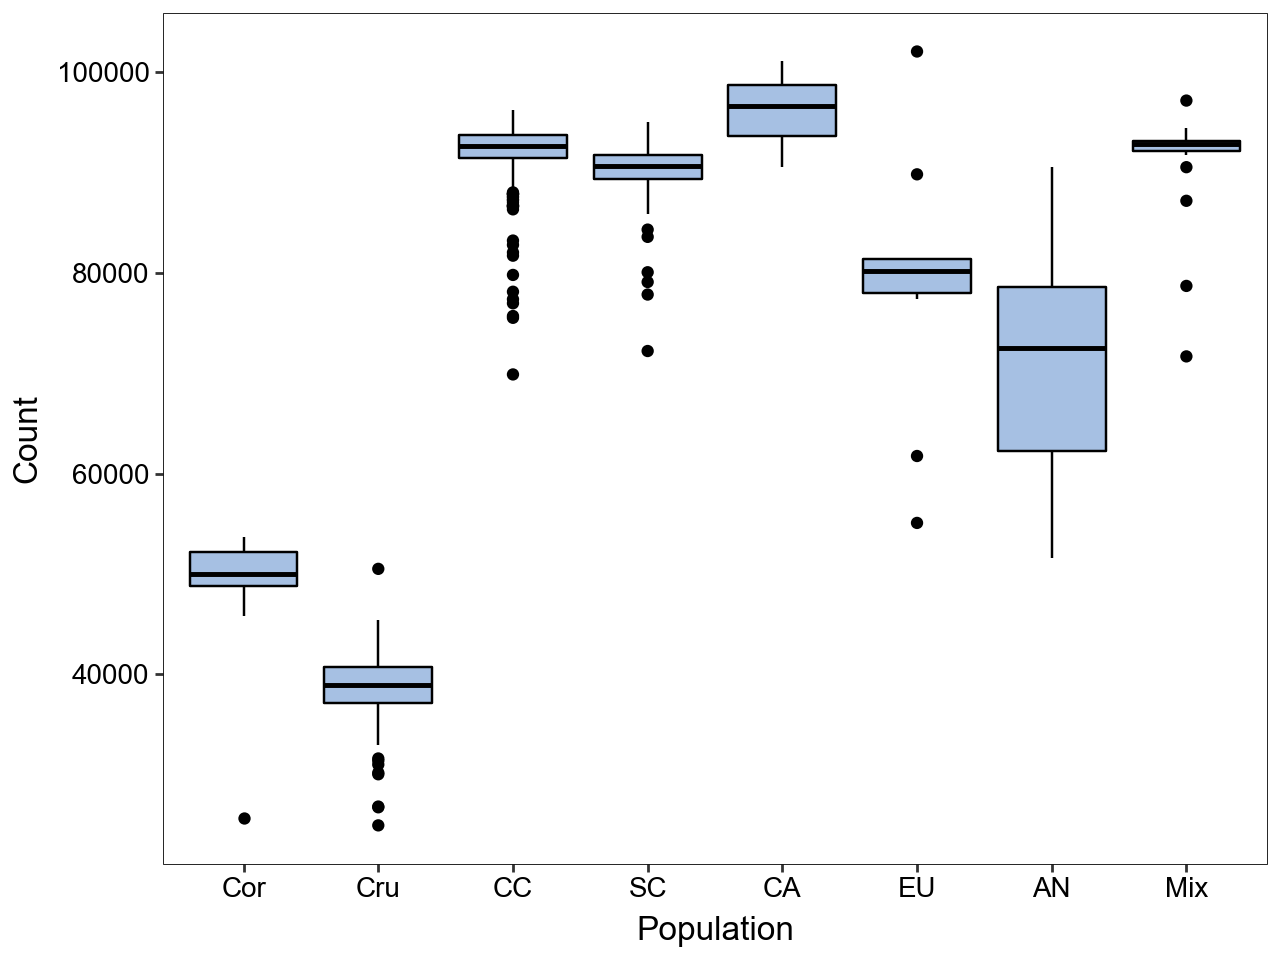

/data2/share/home/liyi/software/miniconda3/envs/plot_make/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/data2/share/home/liyi/software/miniconda3/envs/plot_make/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: reseq_all_site_count.svg


In [4]:
reseq_mat2['pop'] = pd.Categorical(reseq_mat2['pop'], categories=['Cor', 'Cru', 'CC', 'SC', 'CA', 'EU', 'AN', 'Mix'], ordered=True)
plot1 = (
    ggplot(reseq_mat2, aes(x='pop', y='TE_num'))
    + geom_boxplot(fill='#A6C0E3', color='black', width=0.8)
    + theme(
        axis_title_x=element_text(size=12, color="black", family="Arial"),
        axis_title_y=element_text(size=12, color="black", family="Arial"),
        axis_text_x=element_text(size=10, color="black", family="Arial"),
        axis_text_y=element_text(size=10, color="black", family="Arial"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_background=element_rect(fill='white'),
        panel_border=element_rect(color="black", size=0.3),
    )
    + labs(x='Population', y='Count')
)

plot1.show()
plot1.save(f"reseq_{specie}_site_count.svg", format="svg", dpi=300)

In [1]:
import os, sys
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

os.chdir(r'/data2/share/home/liyi/CbpTE/ReseqTE_matrix/19Ge_reseq_matrix/filt')

In [3]:
file1 = f'/data2/share/home/liyi/CbpTE/ReseqTE_matrix/19Ge_reseq_matrix/0-scripts/population.txt'
pop_info = pd.read_csv(file1, sep='\t', dtype=str, header=None, names=['acc', 'pop'])
Cbp_pop = ['CC', 'SC', 'CA', 'Mix', 'EU', 'AN']

In [4]:
reseq_mat1 = pd.read_csv(f'reseq_Cbp.mat.filtmr', sep='\t', dtype=str)
reseq_Cor_mat = reseq_mat1.iloc[:76891, :]
reseq_Cru_mat = reseq_mat1.iloc[76891:, :]
reseq_mat2 = pd.read_csv(f'reseq_Cor.mat.filtmr', sep='\t', dtype=str)
reseq_cor_mat = reseq_mat2.iloc[:67977, :]
reseq_mat3 = pd.read_csv(f'reseq_Cru.mat.filtmr', sep='\t', dtype=str)
reseq_cru_mat = reseq_mat3.iloc[91924:, :]

In [10]:
pop_means = {}
for p in Cbp_pop:
    pop_acc = pop_info.loc[pop_info['pop'] == p, 'acc']
    pop_cor_num = reseq_Cor_mat[pop_acc].eq("1/1").sum().to_frame(name='TE_num')
    pop_cor_num['pop'] = f'{p}.Cor'
    pop_means[f'{p}.Cor'] = pop_cor_num['TE_num'].mean()
pop_num = reseq_cor_mat.iloc[:, 5:].eq("1/1").sum().to_frame(name='TE_num')
pop_num['pop'] = f'C.or'
pop_means[f'C.or'] = pop_num['TE_num'].mean()
cor_pop_mean = pd.DataFrame({'pop': list(pop_means.keys()), 'mean': list(pop_means.values())})

pop_means = {}
for p in Cbp_pop:
    pop_acc = pop_info.loc[pop_info['pop'] == p, 'acc']
    pop_cru_num = reseq_Cru_mat[pop_acc].eq("1/1").sum().to_frame(name='TE_num')
    pop_cru_num['pop'] = f'{p}.Cru'
    pop_means[f'{p}.Cru'] = pop_cru_num['TE_num'].mean()
pop_num = reseq_cru_mat.iloc[:, 5:].eq("1/1").sum().to_frame(name='TE_num')
pop_num['pop'] = f'C.ru'
pop_means[f'C.ru'] = pop_num['TE_num'].mean()
cru_pop_mean = pd.DataFrame({'pop': list(pop_means.keys()), 'mean': list(pop_means.values())})

In [12]:
cor_pop_mean

,pop,mean
0,CC.Cor,37563.525054
1,SC.Cor,37343.502841
2,CA.Cor,33750.861111
3,Mix.Cor,37144.291667
4,EU.Cor,28353.500000
5,AN.Cor,27212.647059
6,C.or,21286.354167


In [11]:
cru_pop_mean

,pop,mean
0,CC.Cru,34179.965142
1,SC.Cru,33770.642045
2,CA.Cru,32959.000000
3,Mix.Cru,33730.750000
4,EU.Cru,27680.600000
5,AN.Cru,26544.176471
6,C.ru,16154.574074
